In [11]:
from gensim.parsing.preprocessing import stem_text
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim import corpora, models 
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
sys.path.append('../')
from utils import word_frequency_per_player, remove_similar_rows_per_player
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import pyLDAvis
from pyLDAvis.gensim_models import prepare
import re
from seaborn import countplot, distplot, heatmap, histplot
import numpy as np
import pickle
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from gensim.parsing.preprocessing import remove_stopwords



# Load data and convert to stemmed data 

In [13]:
# load data and drop NA's
df = pd.read_csv('/Users/kevingiesen/Library/Mobile Documents/com~apple~CloudDocs/BIPM Master/Semester 2/TWSM/TWSM Project/SS23-BIPM-Analytics-Lab---Group-4-repository/Preprocessing/data_clean/en_clean_condensed.csv')

## Wordcloud
Build a wordcloud in order to see words which could be deleted for clustering
Because some words appear in every cluster they need to be deleted

In [14]:
stopwords = {"bayerleverkusen", "leverkusen", "xa", "xaful"}

# Apply the remove_stopwords function to the 'text' column using the apply method
df['data'] = df['data'].apply(lambda x: remove_stopwords(x, stopwords))

/opt/homebrew/lib/python3.9/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


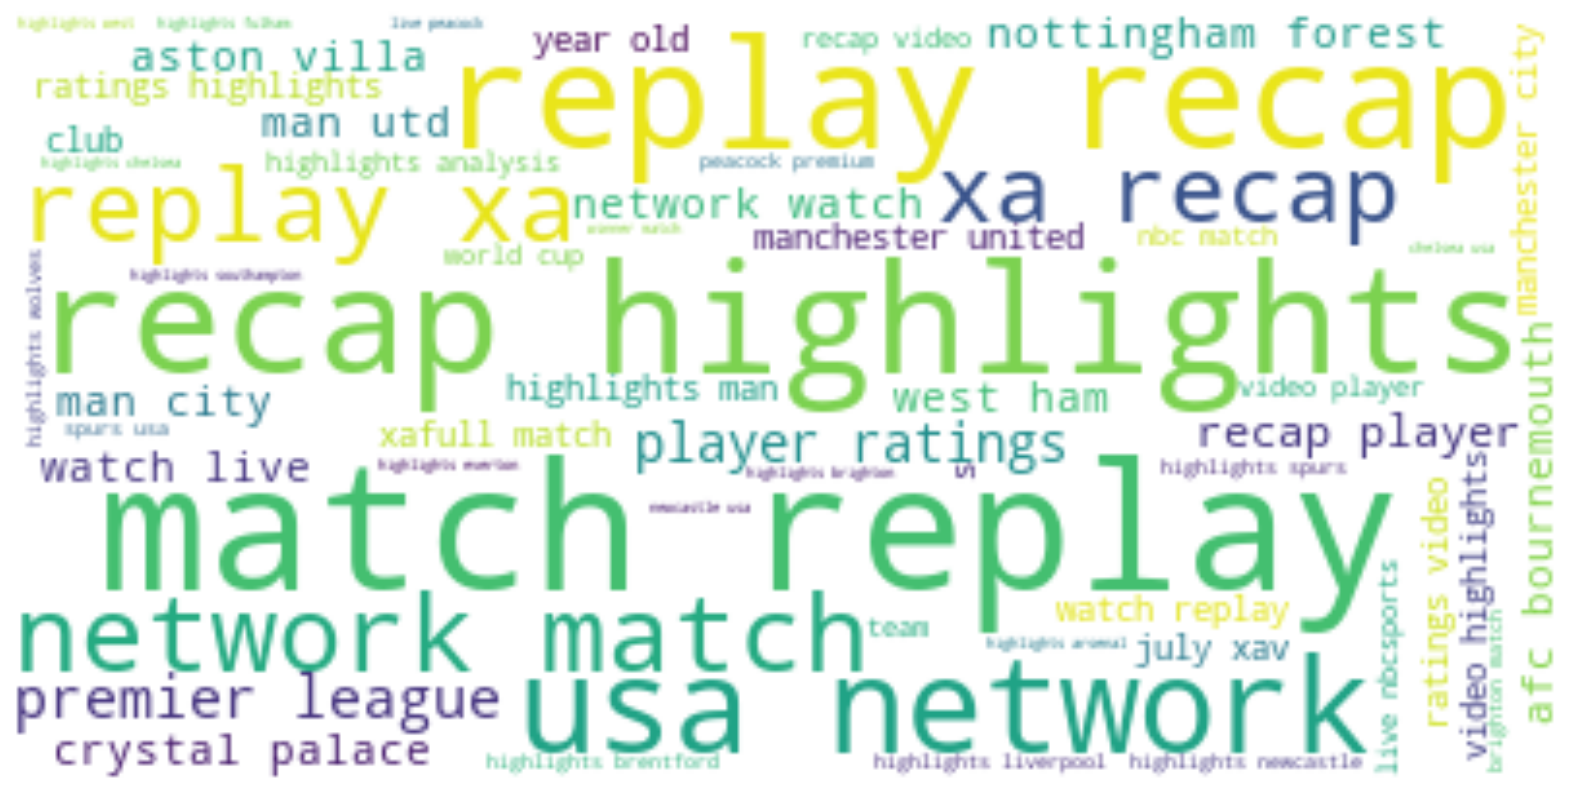

In [15]:
# store the complete text in all_text
all_text = df['data'].str.cat(sep=' ')

# create a plot
plt.figure(figsize=(20,20))

# create a wordcloud
wordcloud = WordCloud( background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Stemming

In [ ]:
# create two copies 
df_stem = df.copy()

# create stemmed data
df_stem['data'] = df_stem['data'].apply(stem_text)

In [17]:
# Remove the similiar rows (The Function is imported from utils on top)
df_stem = remove_similar_rows_per_player(df_stem, df_stem['player'].unique())

In [18]:
# vectorize data 
tfidf = TfidfVectorizer(max_df=0.95, min_df=0.02)
df_tfidf = tfidf.fit_transform(df_stem.data).toarray()

In [19]:
df_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04498353, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [20]:
#Store the frequency matrix in data_tfidf. 
data_tfidf = pd.DataFrame(df_tfidf, columns=tfidf.vocabulary_.keys())

#data_tfidf['target_names']=sorted_df_ng.target_names.values #we can't use that because otherwise knn wouldn't work
data_tfidf.head()

,footbal,wirtz,goal,europaleagu,repres,step,road,recoveri,german,adam,...,badiashil,moura,mateo,xaraheem,xarasmu,holjund,xaivan,noni,maduek,lewi
0,0.000000,0.0,0.0,0.0,0.044754,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.044878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.154527,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.126040,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#Store the feature names in a words list.
words = data_tfidf.columns.tolist()[:-2] 
words

['footbal',
 'wirtz',
 'goal',
 'europaleagu',
 'repres',
 'step',
 'road',
 'recoveri',
 'german',
 'adam',
 'bayarena',
 'discuss',
 'player',
 'potenti',
 'sport',
 'director',
 'simon',
 'rolf',
 'fridai',
 'februari',
 'moment',
 'wait',
 'for',
 'came',
 'special',
 'bayerleverkusen',
 'long',
 'term',
 'knee',
 'injuri',
 'game',
 'monaco',
 'touch',
 'ball',
 'time',
 'score',
 'it',
 'includ',
 'vollei',
 'team',
 'mat',
 'build',
 'up',
 'never',
 'move',
 'boot',
 'finish',
 'show',
 'quick',
 'shift',
 'foot',
 'seen',
 'minut',
 'earlier',
 'previou',
 'diaby',
 'calm',
 'abil',
 'break',
 'stride',
 'best',
 'possess',
 'felt',
 'winner',
 'late',
 'win',
 'leg',
 'play',
 'off',
 'round',
 'blow',
 'latest',
 'journei',
 'bigger',
 'story',
 'speak',
 'offic',
 'stadium',
 'english',
 'know',
 'wonder',
 'talent',
 'yet',
 'you',
 'do',
 'tell',
 'sky',
 'sports',
 'sens',
 'right',
 'great',
 'hope',
 'football',
 'excit',
 'return',
 'fit',
 'extend',
 'far',
 'club',


# KMeans clustering 

## Try out different cluster sizes

In [ ]:
# create list where the models will be stored
kmeans_models_arr = {'cluster_' + str(iter): '' for iter in range(2, 15)}

# create models with 2-15 clusters
for iter in range(2, 15): 
    
    model = KMeans(n_clusters = iter, max_iter=1000, random_state=42)
    model.fit(data_tfidf)

    kmeans_models_arr.update({'cluster_'+ str(iter): model})


In [23]:
# store the common words for each cluster
common_words = kmeans_models_arr['cluster_8'].cluster_centers_.argsort()[:,-1:-31:-1]

for num, centroid in enumerate(common_words):
    words_in_centroid = [words[word] for word in centroid if word < len(words)]
    print(f"{num}: {', '.join(words_in_centroid[:30])}")

0: wilson, uncertain, cnbc, million, precis, def, goes, hotspur, henri, jorginho, versu, highlightsmondai, humili, januarysouthampton, mason, highlightssaturdai, ceil, anderson, recoveri, took, qualif, cont, questionable, diaby, and, led, popular, location, saturdai, sit
1: lead, goes, def, sit, streak, questionable, humili, highlightsmondai, mattemoretto, italia, pillow, bailli, excit, alvarez, respond, location, presentation, recap, took, januarysouthampton, entertain, versu, hire, luke, colleagues, associ, acquir, yann, seal, anthoni
2: taken, convers, bye, taunt, produc, perfectli, drama, counti, arsenalthi, public, lufc, tight, fridai, independ, specul, bracket, times, observ, sergio, tierney, factor, youtub, remontada, ccoffici, england, ward, rang, everton, quizzes, nesyri
3: consider, start, richard, facilit, resultsgroup, taunt, bye, perfectli, produc, drama, arsenalthi, tight, fridai, times, counti, independ, public, sergio, lufc, specul, observ, tierney, remontada, look, lev

## Cluster naming
0 = Europa League
___
1 = Bundesliga news
___
2 = Europa League
___
3 = Game Situations and Match Performance
___
4 = Europa League
___
5 = Game Situations and Match Performance
___
6 = Bundesliga News
___
7 = Europa League

In [24]:
df_kmeans = df_stem.copy()
# assign cluster to dataframe
df_kmeans['cluster'] = kmeans_models_arr['cluster_8'].labels_
df_kmeans

,data,player,language,publishedAt,cluster
0,"footbal wirtz\' goal europaleagu repres step road recoveri german teenager; adam bate bayarena discuss player\' vast potenti sport director simon rolf @ghostgoal fridai februari moment wirtz wait for, moment bayarena wait for, came special. goal bayerleverkusen' wunderkind long-term knee injuri lit game monaco. wirtz touch ball time score it. includ toe-pok vollei team-mat build-up. touch ball never move metr boot finish show special. quick shift ball foot seen minut earlier previou dribbl catalyst diaby\' equaliser. calm game, abil glide break stride, best possess. felt cruel wirtz winner. late goal monaco win leg europaleagu play-off round. blow supporters, wider game, latest step wirtz\' journei bigger story. speak sport director simon rolf offic stadium, english audienc know wirtz\' wonder talent yet. laughs. ""you do,"" rolf tell sky sports. sens right. wirtz great hope german football. excit return fit extend far club point illustr wide smile face nation team coach hansi flick, celebr alongsid rudi voller stands. badli miss world cup, expect poster boi euro anterior cruciat ligament injuri sort setback stifl careers, precoci bundesliga debut week turn transfer centr live! bundesliga tabl footbal featur download sky sport app adapt quickly, score bayern munich fourth appear make intern debut follow year. world his. month test, therefore, physic emotionally. handl challenge? ""realli well,"" insist rolfes. ""from mental side, incredible. works, ambiti is, stabl emotionally. see technic side, fantast passes, dribbling, whatever. amazing. focused."" result return team miss beat. assist start bochum month man-of-the-match perform hoffenheim complet minut weekend. best. pace run awai player there. low centr graviti allow hold marker untroubled. indic injuri lower ceiling. delai slow down. mental strength evid play. skil player pitch hardest working, encourag join pressing. ""alreadi young age, leader team, inspir player behaviour."" times, plai adam hlozek, flexibl shape shift possession. system, wirtz look comfort tight spaces. absence, sack head coach gerardo seoan october, bring alonso. spain intern good wirtz. club happiest plai counter-attack thrive pass team. game, one-touch lay-offs, awar flick ball corner. ""he excel player excel team player. make player better him. top player ability,"" explain rolfes. ""one thing mention mental side, technic side, find space score, assists, acceler game. positions, solutions."" wirtz answer bayerleverkusen. ""the kei player us."" question good become. ""the potenti huge."" day. now, let simpli celebr return special talent. ""it great back."" watch mainz live sky sport footbal sunday; kick-off .pm saturday, chanc win ps, super plai free, entri pm. (c) sky uk'}",exequiel palacios,en,2023-02-16T23:56:00Z,1
1,"[/]\xasocc footbal europaleagu play-off second leg monaco stade loui ii, monaco, franc februari player celebr win penalti shoot-out reuters/er gaillard monaco, feb (reuters) beat monaco penalti win frantic second leg europaleagu playoff thursdai send game extra time team lock aggregate. monaco midfield eliot matazo hit bar second round spot-kick winger diabi seal victori german sent bayerleverkusen, lost home leg week, level tie minut midfield wirtz mistak monaco keeper alexand nuebel. monaco striker wissam ben yedder equalis minut later spot, host earn penalti edmond tapsoba\' foul monaco midfield eliess ben seghir. took lead minute, midfield struck edg box follow corner adli hour mark fine header. monaco, however, level tie breel embolo\' header neither team abl score extra time held nerv shootout win two-leg knockout tie major european competit time lose leg home. standards: thomson reuter trust principles. actor adjoa andoh read william shakespeare\' ""richard iii"" child, struck treated. reuters, new media divis thomson reuters, world' largest multimedia new provider, reach billion peopl worldwid day. reuter provid business, financi

In [ ]:
# map the clusters to topics
def map_cluster_topic(cluster):
    if cluster == 3 or cluster == 5:
        return 'Game Situations and Match Performance'
    elif cluster == 1 or cluster == 6 :
        return 'Bundesliga News'
    elif cluster == 0 or cluster == 2 or cluster == 4 or cluster ==7:
        return 'Europa League'


# Apply the function and create 'sentiment_tb_desc' column
df_kmeans['topic'] = np.vectorize(map_cluster_topic)(df_kmeans['cluster'])

In [ ]:
#df_kmeans.to_csv('/Users/kevingiesen/Library/Mobile Documents/com~apple~CloudDocs/BIPM Master/Semester 2/TWSM/TWSM Project/SS23-BIPM-Analytics-Lab---Group-4-repository/Modeling/modeled_data/clustered_data_kmeans_ger_v2.csv', index=False)

In [ ]:
# store the model in a pickle file 
#with open('/Users/kevingiesen/Library/Mobile Documents/com~apple~CloudDocs/BIPM Master/Semester 2/TWSM/TWSM Project/SS23-BIPM-Analytics-Lab---Group-4-repository/Modeling/models/de_final_topic_model.pkl', 'wb') as file:
#    pickle.dump(kmeans_models_arr['cluster_8'], file)